In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import *


The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-11-30 18:16:24] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-30 18:16:25] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-30 18:16:26] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-11-30 18:16:36] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-30 18:16:36] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-30 18:16:36] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-30 18:16:36] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
### class inits and other inputs

path_model = 'yolo_nas_m' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth"]

### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2023-11-30 12:35:14] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-30 12:35:15] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [5]:
# Initialize a list to store models
models = []

# Loop over each path and load the model
for path in finetuned_model_path:
    model = my_nas.load(path_model,path)  # Load the model using the current path
    models.append(model)

# Now models list contains all the loaded models
# You can now evaluate each model and store the results



[2023-11-30 12:35:23] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-11-30 12:35:24] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-11-30 12:35:25] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-11-30 12:35:26] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-11-30 12:35:27] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


In [6]:
evaluation_results = []

for model in models:
    metrics = my_nas.evaluate_trained_model(model, data_yaml_path, "test")  # Replace with your evaluation function
    evaluation_results.append(metrics)

[2023-11-30 12:35:32] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 14/14 [05:47<00:00, 24.84s/it]
[2023-11-30 12:41:21] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has star

Testing: 100%|██████████| 14/14 [06:09<00:00, 26.37s/it]


In [8]:
evaluation_results


[{'Precision@0.50': 0.8437204957008362,
  'Recall@0.50': 0.9530666470527649,
  'mAP@0.50': 0.9385061264038086,
  'F1@0.50': 0.8950663208961487,
  'Precision@0.50:0.95': 0.6427761912345886,
  'Recall@0.50:0.95': 0.7260799407958984,
  'mAP@0.50:0.95': 0.6872483491897583,
  'F1@0.50:0.95': 0.6818932890892029},
 {'Precision@0.50': 0.8538681864738464,
  'Recall@0.50': 0.9535999894142151,
  'mAP@0.50': 0.9403137564659119,
  'F1@0.50': 0.9009826183319092,
  'Precision@0.50:0.95': 0.6519102454185486,
  'Recall@0.50:0.95': 0.7280533909797668,
  'mAP@0.50:0.95': 0.6889483332633972,
  'F1@0.50:0.95': 0.6878811120986938},
 {'Precision@0.50': 0.8388603329658508,
  'Recall@0.50': 0.9578666687011719,
  'mAP@0.50': 0.9380720257759094,
  'F1@0.50': 0.8944222927093506,
  'Precision@0.50:0.95': 0.6468939781188965,
  'Recall@0.50:0.95': 0.7386666536331177,
  'mAP@0.50:0.95': 0.7012360692024231,
  'F1@0.50:0.95': 0.6897410154342651},
 {'Precision@0.50': 0.8396982550621033,
  'Recall@0.50': 0.94986665248870

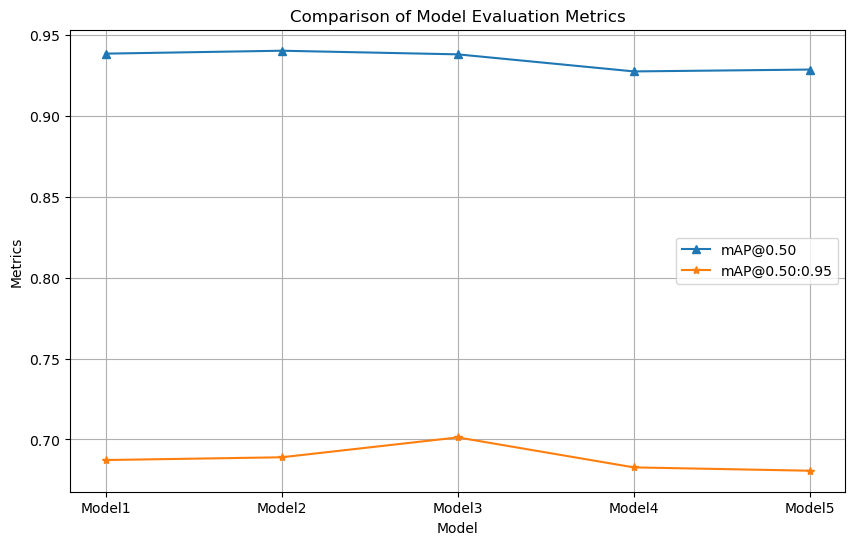

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame(evaluation_results)

results_df = pd.DataFrame(evaluation_results)

# Generate model labels based on the number of entries in your DataFrame
model_labels = [f'Model{i+1}' for i in range(len(results_df))]

# Plotting
plt.figure(figsize=(10, 6))

#plt.plot(results_df['Precision@0.50'], '-o', label='Precision@0.50')
#plt.plot(results_df['Recall@0.50'], '-s', label='Recall@0.50')
plt.plot(results_df['mAP@0.50'], '-^', label='mAP@0.50')
#plt.plot(results_df['F1@0.50'], '-d', label='F1@0.50')
##plt.plot(results_df['Precision@0.50:0.95'], '-x', label='Precision@0.50:0.95')
#plt.plot(results_df['Recall@0.50:0.95'], '-+', label='Recall@0.50:0.95')
plt.plot(results_df['mAP@0.50:0.95'], '-*', label='mAP@0.50:0.95')
#plt.plot(results_df['F1@0.50:0.95'], '-p', label='F1@0.50:0.95')

plt.title('Comparison of Model Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.xticks(range(len(results_df)), model_labels)  # Dynamic model labels
plt.legend()
plt.grid(True)
plt.show()


In [3]:
path_model = 'yolo_nas_m' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path = "/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth"
### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2023-11-30 18:16:43] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-30 18:16:43] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [4]:
### load finetuned model

best_model = my_nas.load(path_model,finetuned_model_path)
#my_nas = torch.load(finetuned_model_path)
#print(checkpoint.keys())


[2023-11-30 18:16:48] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


In [5]:
my_nas.evaluate_trained_model(best_model, data_yaml_path, "test")

[2023-11-30 18:16:50] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 14/14 [06:15<00:00, 20.66s/it]

{'Precision@0.50': 0.8538681864738464,
 'Recall@0.50': 0.9535999894142151,
 'mAP@0.50': 0.9403137564659119,
 'F1@0.50': 0.9009826183319092,
 'Precision@0.50:0.95': 0.6519102454185486,
 'Recall@0.50:0.95': 0.7280533909797668,
 'mAP@0.50:0.95': 0.6889483332633972,
 'F1@0.50:0.95': 0.6878811120986938}

Testing: 100%|██████████| 14/14 [06:25<00:00, 27.52s/it]


In [ ]:
#my_nas.get_evaluation_matrix(best_model, data_yaml_path)

In [8]:
path_model = 'yolo_nas_s' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path_s = "/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth"
### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2023-11-30 18:30:05] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-30 18:30:05] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [10]:
best_model_s = my_nas.load(path_model,finetuned_model_path_s)

[2023-11-30 18:30:49] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


In [11]:
my_nas.evaluate_trained_model(best_model_s, data_yaml_path, "test")

[2023-11-30 18:31:16] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 14/14 [03:58<00:00, 12.40s/it]

{'Precision@0.50': 0.8495752215385437,
 'Recall@0.50': 0.9066666960716248,
 'mAP@0.50': 0.8858373165130615,
 'F1@0.50': 0.8771929740905762,
 'Precision@0.50:0.95': 0.6161919236183167,
 'Recall@0.50:0.95': 0.6576000452041626,
 'mAP@0.50:0.95': 0.6127024292945862,
 'F1@0.50:0.95': 0.6362229585647583}

Testing: 100%|██████████| 14/14 [04:08<00:00, 17.72s/it]
